In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # plot

#import funcs
from datetime import datetime
from matplotlib.pyplot import cm

In [2]:
# Load the dataset
df_train = pd.read_csv('train.csv', parse_dates=['Date'])

# Display the information about database
df_train.info()

# Display the first 5 rows of the dataset
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
#Check duplicate:
df_reset = df_train.reset_index()
df_reset[df_reset.duplicated(subset=['Date', 'Store', 'Dept'])]

,index,Store,Dept,Date,Weekly_Sales,IsHoliday


In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


In [5]:
# Group by Store and Date
df_train = df_train.groupby(['Store', 'Date']).sum(['Weekly_Sales'])

# Drop Dept and IsHoliday columns as we will not need this information upon joining with features.csv file
df_train.drop(columns = ['Dept', 'IsHoliday'], inplace = True)
df_train.reset_index(inplace = True)

In [6]:
# Inspect the new data frame
df_train.info()
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB
   Store       Date  Weekly_Sales
0      1 2010-02-05    1643690.90
1      1 2010-02-12    1641957.44
2      1 2010-02-19    1611968.17
3      1 2010-02-26    1409727.59
4      1 2010-03-05    1554806.68


In [7]:
# Read in df_feature data frame
df_feature = pd.read_csv('features.csv', parse_dates = ['Date'])
df_feature.info()
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31

In [8]:
# Create new column IsPromotion - True if there is no null values in any of the 5 MarkDown columns
df_feature['IsMarkdown'] = np.where(df_feature['MarkDown1'].isnull() &
                                    df_feature['MarkDown2'].isnull() &
                                    df_feature['MarkDown3'].isnull() &
                                    df_feature['MarkDown4'].isnull() &
                                    df_feature['MarkDown5'].isnull(), False, True)

df_feature.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True)

In [9]:
# Inspect our new DataFrame
print(df_feature.head())

   Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0      1 2010-02-05        42.31       2.572  211.096358         8.106   
1      1 2010-02-12        38.51       2.548  211.242170         8.106   
2      1 2010-02-19        39.93       2.514  211.289143         8.106   
3      1 2010-02-26        46.63       2.561  211.319643         8.106   
4      1 2010-03-05        46.50       2.625  211.350143         8.106   

   IsHoliday  IsMarkdown  
0      False       False  
1       True       False  
2      False       False  
3      False       False  
4      False       False  


In [10]:
# Join the two DataFrames
df = df_feature.merge(df_train, on=['Date', 'Store'], how = 'inner')

In [11]:
# Inspect the new data frame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   CPI           6435 non-null   float64       
 5   Unemployment  6435 non-null   float64       
 6   IsHoliday     6435 non-null   bool          
 7   IsMarkdown    6435 non-null   bool          
 8   Weekly_Sales  6435 non-null   float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1)
memory usage: 364.6 KB


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,False,1643690.90
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,False,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,False,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,False,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,False,1554806.68


In [12]:
# See which stores generate the most and the least sales per week
avg_weekly_sales = df.groupby('Store')['Weekly_Sales'].mean()

avg_weekly_sales.sort_values(ascending = False, inplace =True)

In [13]:
# Find the highest average weekly sales
top_store = avg_weekly_sales.head(1)
top_store

Store
20    2.107677e+06
Name: Weekly_Sales, dtype: float64

In [14]:
# Find the lowest average weekly sales
low_store= avg_weekly_sales.tail(1)
low_store

Store
33    259861.692028
Name: Weekly_Sales, dtype: float64

In [15]:
# Set 'Date' column as the index of the DataFrame
df.set_index('Date', inplace = True)

In [109]:
# Select data for the store with the highest average sales
top_store = df[df['Store'] == 20].copy()

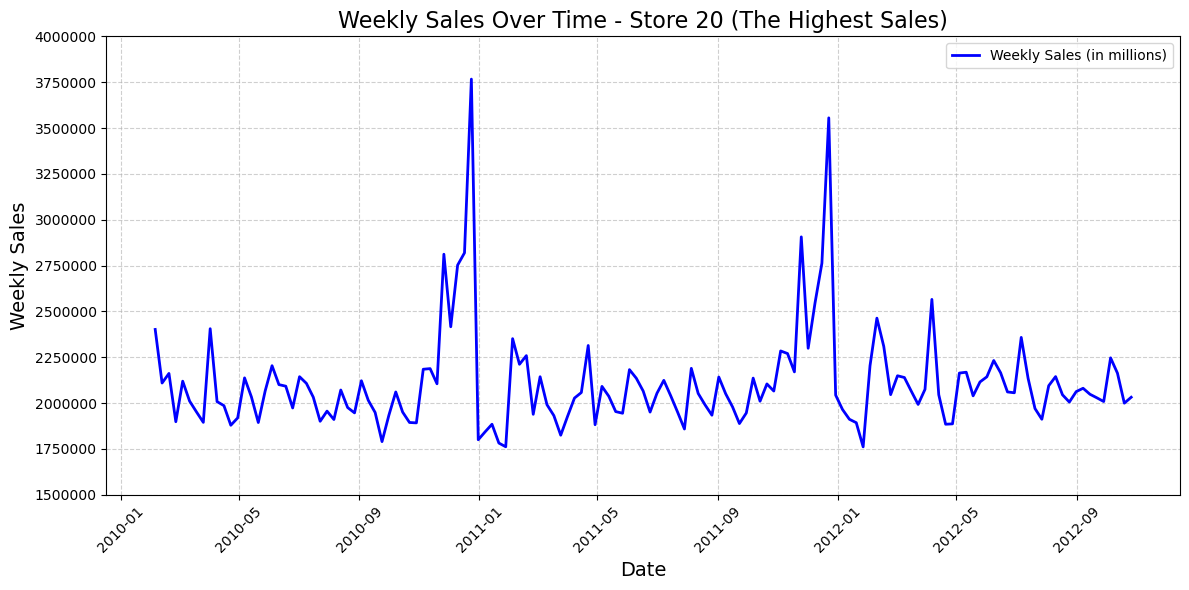

In [111]:
# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the sales line
plt.plot(top_store.index, top_store['Weekly_Sales'] / 1e6, color='blue', linewidth=2, label='Weekly Sales (in millions)')


# Add title and axis labels
plt.title('Weekly Sales Over Time - Store 20 (The Highest Sales)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)

# Get the current y-ticks, multiply by 1000000 to convert to full numbers (without decimal)
ticks = plt.gca().get_yticks()
plt.gca().set_yticks(ticks)
plt.gca().set_yticklabels([f'{int(tick * 1000000)}' for tick in ticks])


plt.tight_layout()


# Display the plot
plt.show()

In [95]:
# Select data for the store with the lowest average sales
low_store = df[df['Store'] == 33].copy()

            Store  Temperature  Fuel_Price         CPI  Unemployment  \
Date                                                                   
2010-02-05     33        58.40       2.962  126.442065        10.115   
2010-02-12     33        55.47       2.828  126.496258        10.115   
2010-02-19     33        62.16       2.915  126.526286        10.115   
2010-02-26     33        56.50       2.825  126.552286        10.115   
2010-03-05     33        59.17       2.877  126.578286        10.115   
...           ...          ...         ...         ...           ...   
2012-09-28     33        86.42       3.966  131.043000         7.147   
2012-10-05     33        85.18       4.132  131.075667         6.895   
2012-10-12     33        79.64       4.468  131.108333         6.895   
2012-10-19     33        75.55       4.449  131.149968         6.895   
2012-10-26     33        73.70       4.301  131.193097         6.895   

            IsHoliday  IsMarkdown  Weekly_Sales  
Date         

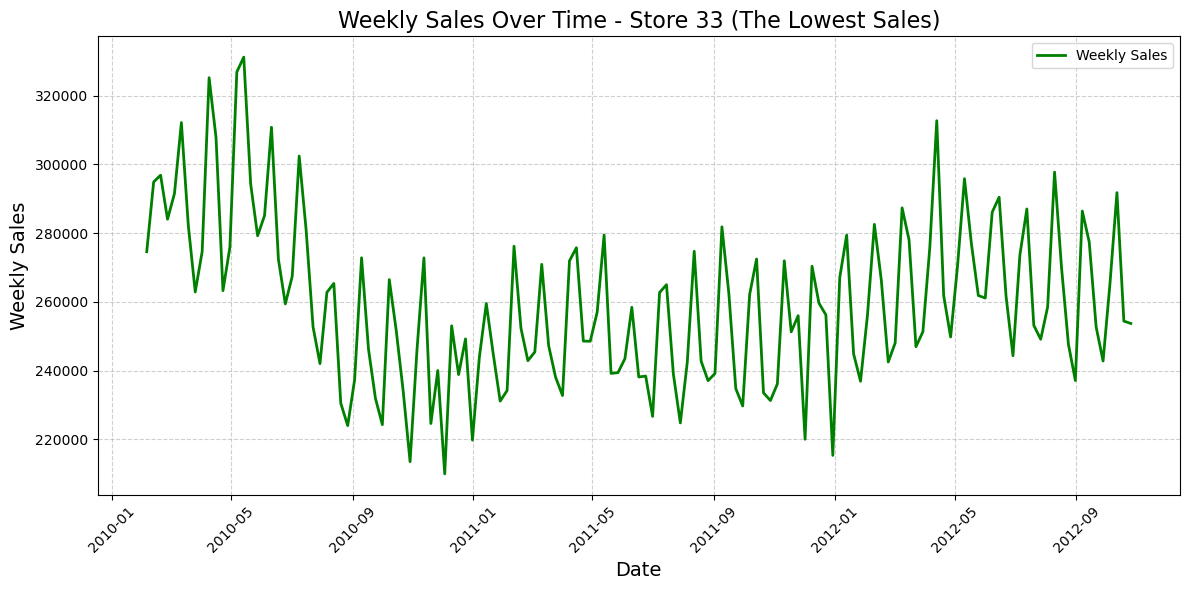

In [97]:
# Plot Weekly Sales over time
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the sales line
plt.plot(low_store.index, low_store['Weekly_Sales'], color='green', linewidth=2, label='Weekly Sales')

# Add title and axis labels
plt.title('Weekly Sales Over Time - Store 33 (The Lowest Sales)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Rotate date labels
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [113]:
# Adding dummy columns for every month in a year
month = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

for m in month.keys():
    if (m == 'Nov') | (m == 'Dec'):
        year = ['2010', '2011']
    else:
        year = ['2010', '2011', '2012']
    for y in year:
        top_store[m] = np.where(top_store.index.strftime('%Y-%m') == y + '-' + month[m], 1, 0)
        low_store[m] = np.where(low_store.index.strftime('%Y-%m') == y + '-' + month[m], 1, 0)

In [119]:
# Fit AutoRegressive model with the dummies created above
from statsmodels.tsa.ar_model import AutoReg

top_store_model = AutoReg(top_store['Weekly_Sales'], lags=0, exog = top_store[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']], trend="n").fit()
print(top_store_model.summary())

low_store_model = AutoReg(low_store['Weekly_Sales'], lags=0, exog = low_store[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']], trend="n").fit()
print(low_store_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                   AutoReg-X(0)   Log Likelihood               -2252.078
Method:               Conditional MLE   S.D. of innovations        1672551.985
Date:                Thu, 01 May 2025   AIC                           4530.157
Time:                        23:24:15   BIC                           4568.674
Sample:                    02-05-2010   HQIC                          4545.808
                         - 10-26-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Jan         1.883e+06   8.36e+05      2.251      0.024    2.43e+05    3.52e+06
Feb         2.255e+06   8.36e+05      2.697      0.007    6.16e+05    3.89e+06
Mar         2.084e+06   7.48e+05      2.786      0.0

C:\Users\npmn9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\npmn9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


| **Rank** | **Month** | **Coefficient (\~USD/week)** | **Interpretation**                                           |
| -------- | --------- | ---------------------------- | ---------------------------------------------------------    |
| 🥇 1     | December  | **\$2,641,000**              | Strongest sales; driven by holiday shopping, Christmas       |
| 🥈 2     | November  | **\$2,408,000**              | Major boost from Thanksgiving, Black Friday, Cyber Monday    |
| 🥉 3     | February  | **\$2,255,000**              | Super Bowl, Post-January rebound; possibly Valentine’s sales |
| 4        | June      | **\$2,131,000**              | Mid-year strength, maybe summer promotions                   |
| 5        | May       | **\$2,121,000**              | Spring sales, pre-summer buildup                             |
| 6        | October   | **\$2,110,000**              | Halloween, fall promotions                                   |
| 7        | April     | **\$2,095,000**              | Steady spring sales                                          |
| 8        | July      | **\$2,094,000**              | Summer sales, but slightly softer                            |
| 9        | August    | **\$2,070,000**              | Back-to-school, but below peak months                        |
| 10       | September | **\$2,041,000**              | School season, moderate boost                                |
| 11       | March     | **\$2,084,000**              | Early spring, steady but not exceptional                     |
| 12       | January   | **\$1,883,000**              | Post-holiday slowdown, weakest month overall                 |

| Rank | Month         | Coefficient (\~USD/week)     | Interpretation                                               |
| ---- | ------------- | ---------------------------- | ---------------------------------                            |
| 🥇 1 | May           | **\$276,300**                | Peak spring sales                                            |
| 🥈 2 | April         | **\$275,100**               | Spring promotions, tax refunds                               |
| 🥉 3 | June          | **\$268,700**                | Start of summer boost                                        |
| 4    | October       | **\$266,300**                | Halloween, early holiday shopping                            |
| 5    | July          | **\$265,800**                | Summer deals, clearance events                               |
| 6    | September     | **\$264,800**                | Back-to-school peak                                          |
| 7    | March         | **\$262,400**                | Spring build-up                                              |
| 8    | August        | **\$262,200**                | Late back-to-school                                          |
| 9    | February      | **\$261,900**                | Valentine’s Day, rebound from Jan                            |
| 10   | January       | **\$257,100**                | Post-holiday recovery                                        |
| 11   | November      | **\$253,900**                | Surprisingly soft holiday impact                             |
| 12   | December      | **\$244,300**                | Post-holiday returns drag sales                              |
